In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# Download the following data set for the code to run:

- [Link](https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg)
- After downloading, please make sure to include the zip file inside the directory of this notebook



## Data exploration


In [11]:
# Define paths
base_dir = 'celeba-dataset'
bbox_excel_path = os.path.join(base_dir, 'list_bbox_celeba.csv')
identity_txt_path = os.path.join(base_dir, 'identity_CelebA.txt')
images_dir = os.path.join(base_dir, 'img_align_celeba', 'img_align_celeba')

# Read the Excel file for bounding boxes
bbox_df = pd.read_csv(bbox_excel_path)

# Read the identity file
identity_df = pd.read_csv(identity_txt_path, sep=" ", header=None, names=['image_id', 'identity'])


In [12]:
# Merge the two dataframes on image_id to have the identity along with bbox
merged_df = pd.merge(bbox_df, identity_df, on="image_id")
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, row in merged_df.iterrows():
    
    if i >= 5:  # Only process the first 5 entries
        break
    img_path = os.path.join(images_dir, row['image_id'])
    img = Image.open(img_path)
    print(img_path)
    # Adjust the coordinates if necessary
    x = row['x_1']   
    y = row['y_1']   
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), row['width'], row['height'], linewidth=1, edgecolor='r', facecolor='none')
    print(x,y,row['width'],row['height'])
    # Add the patch to the Axes
    axs[i].imshow(img)

plt.tight_layout()
plt.show()

     image_id  x_1  y_1  width  height  identity
0  000001.jpg   95   71    226     313      2880
1  000002.jpg   72   94    221     306      2937
2  000003.jpg  216   59     91     126      8692
3  000004.jpg  622  257    564     781      5805
4  000005.jpg  236  109    120     166      9295


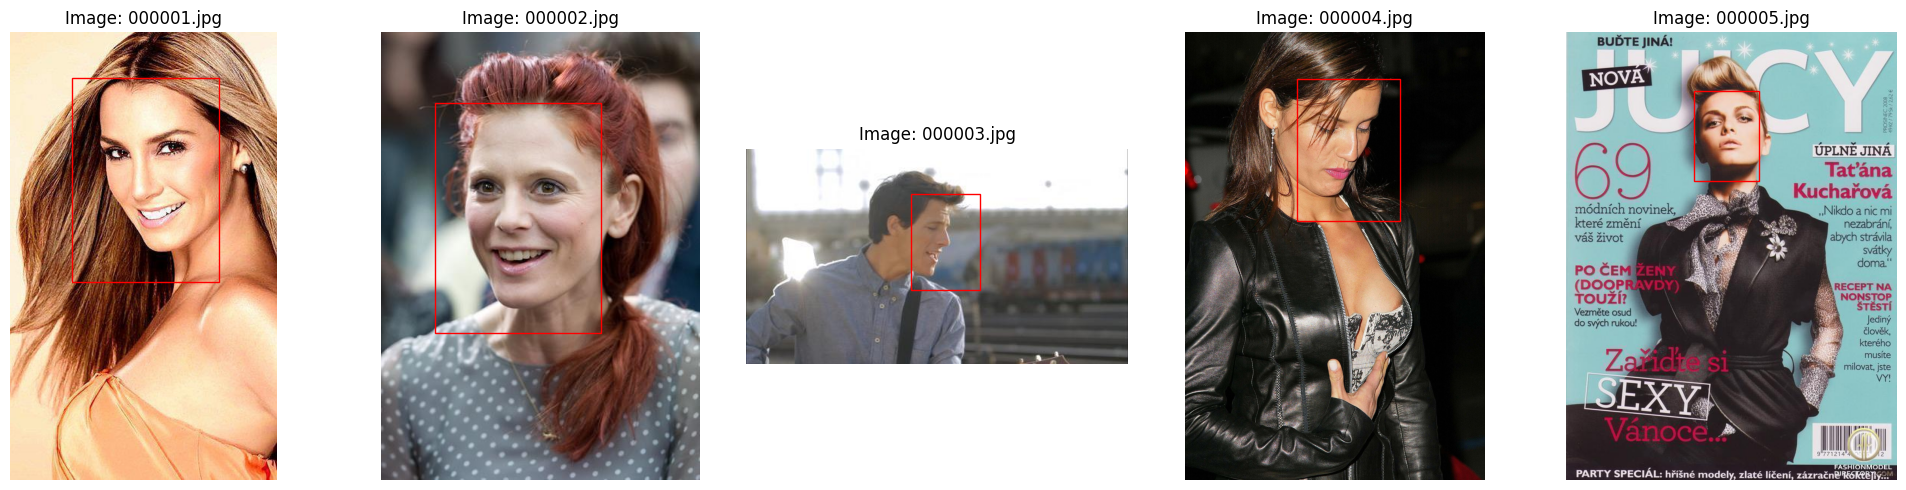